In [2]:
import torch
import os
import random
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
from tqdm import tqdm

from datasets import load_dataset, concatenate_datasets

from llava.data_utils.data_utils import load_yaml, construct_prompt, save_json, process_single_sample, CAT_SHORT2LONG
from llava.data_utils.set_seed import set_seed

device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
set_seed(42)

## Import Dataset

In [2]:
sub_dataset_list = []
for subject in CAT_SHORT2LONG.values():
    sub_dataset = load_dataset("MMMU/MMMU", subject, split="validation")
    sub_dataset_list.append(sub_dataset)

# merge all dataset
dataset = concatenate_datasets(sub_dataset_list)

In [53]:
arr_easy_expl = []
for i in range(900):
    if dataset[i]["explanation"] != '' and dataset[i]["topic_difficulty"] == "Easy":
        arr_easy_expl.append(dataset[i])

In [32]:
arr_expl_id = []
arr_expl_diffi = []

for i in range(900):
    if dataset[i]["explanation"] != '':
        if i < 150 and i > 120:
            arr_expl_id.append("Art Theory")
            arr_expl_diffi.append(dataset[i]["topic_difficulty"])
        else:
            arr_expl_id.append(dataset[i]["id"].split("_")[1])
            arr_expl_diffi.append(dataset[i]["topic_difficulty"])
    else:
        pass
  

In [38]:
arr_diffi = []
for i in range(900):
    arr_diffi.append(dataset[i]["topic_difficulty"])

In [36]:
import plotly.express as px

fig = px.histogram(arr_expl_id, title= "MMMU Validation Set Questions with Explanation (max: 30, 7 subjects w/o explanations, 186/900)")
fig.update_layout(showlegend=False, xaxis_title="Subject")
fig.show()

In [43]:
fig = px.histogram(arr_expl_diffi, title= "MMMU Validation Set Explanation Difficulty (max: 424/295/181)")
fig.update_layout(showlegend=False, xaxis_title="Difficulty")
fig.show()

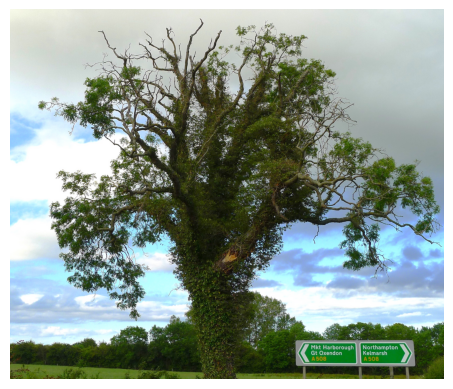

Q: <image 1> Why are the branches of the old ash tree located next to the main road withering?
O: ["Don't know or not sure", 'Repeated root damage by tractors in adjacent field (abiotic)', "Fungal dieback ('ash dieback')", 'Air pollution damage', 'Combination of fungal and abiotic dieback']
A: E
E: The correct answer is:
Fungal (Hymenoscyphus fraxineus) and abiotic dieback. Let's not forget that ash dieback of the abiotic variety has been around for decades in th UK. Separate the wispy dieback (fungal) around the crown periphery from the larger dead branches I associate with root disturbance and other abiotic factors. Described as stag-headed because they look like antlers.
Comments on the other options:
Air pollution is one of those fall-back options: when pest and disease options have been ostensibly eliminated look for something that could have a widespread impact on tree growth. Nutrient deficiencies is another fall-back option. I've not included lightning damage. I said diagnosing

In [59]:
import matplotlib.pyplot as plt
n = 6
plt.imshow(arr_easy_expl[n]["image_1"])
plt.axis("off")

plt.show()
print("Q: " + arr_easy_expl[n]["question"] + "\nO: " + arr_easy_expl[n]["options"] + "\nA: " + arr_easy_expl[n]["answer"]+ "\nE: " + arr_easy_expl[n]["explanation"])